## Setup

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
sns.set_palette('Dark2')

In [94]:
data = pd.read_csv('../Data_prep/Louisville_Animal_Cleaned.csv')

## Prelim review

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41963 entries, 0 to 41962
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   intype      41963 non-null  object
 1   insubtype   41963 non-null  object
 2   surreason   41963 non-null  object
 3   outtype     41963 non-null  object
 4   animaltype  41963 non-null  object
 5   sex         41963 non-null  object
 6   bites       41963 non-null  object
 7   petsize     41963 non-null  object
 8   color       41963 non-null  object
 9   breed       41963 non-null  object
 10  mixed       41963 non-null  bool  
 11  breed2      41963 non-null  object
 12  days_in     41963 non-null  int64 
 13  in_season   41963 non-null  object
 14  out_season  41963 non-null  object
dtypes: bool(1), int64(1), object(13)
memory usage: 4.5+ MB


In [96]:
data.head()

,intype,insubtype,surreason,outtype,animaltype,sex,bites,petsize,color,breed,mixed,breed2,days_in,in_season,out_season
0,STRAY,OTC,STRAY,RTO,DOG,F,N,MED,TAN / BLACK,ENG BULLDOG,True,Unknown,3,SPRING,SPRING
1,STRAY,OTC,STRAY,ADOPTION,CAT,N,N,LARGE,ORG TABBY,DOMESTIC SH,False,NM,5,SPRING,SPRING
2,STRAY,OTC,STRAY,FOSTER,DOG,S,N,MED,CHOCOLATE / WHITE,PIT BULL,False,NM,26,SPRING,SPRING
3,STRAY,OTC,STRAY,ADOPTION,DOG,N,Y,PUPPY,TAN,PIT BULL,True,Unknown,13,SPRING,SPRING
4,STRAY,OTC,STRAY,EUTH,DOG,M,Y,MED,BL BRINDLE,PIT BULL,False,NM,9,SUMMER,SUMMER


In [97]:
data.tail()

,intype,insubtype,surreason,outtype,animaltype,sex,bites,petsize,color,breed,mixed,breed2,days_in,in_season,out_season
41958,STRAY,OTC,STRAY,ADOPTION,DOG,N,N,LARGE,BLACK / BROWN,LABRADOR RETR,True,Unknown,7,FALL,FALL
41959,STRAY,FIELD,STRAY,TRANSFER,DOG,M,N,MED,BROWN,PIT BULL,False,NM,9,WINTER,WINTER
41960,CONFISCATE,NEGLECT,VIOLATION,ADOPTION,DOG,S,N,MED,BLACK / WHITE,BORDER COLLIE,True,Unknown,24,WINTER,WINTER
41961,CONFISCATE,NEGLECT,CRUELTY,RTO,DOG,M,N,MED,BLUE,PIT BULL,False,NM,4,SUMMER,SUMMER
41962,STRAY,OTC,STRAY,RTO,DOG,N,N,MED,BR BRINDLE,PIT BULL,False,NM,4,FALL,FALL


In [98]:
## summary statistics for categorical variables in a visual format including all the variables
data.describe(include=['object','bool'])


,intype,insubtype,surreason,outtype,animaltype,sex,bites,petsize,color,breed,mixed,breed2,in_season,out_season
count,41963,41963,41963,41963,41963,41963,41963,41963,41963,41963,41963,41963,41963,41963
unique,10,29,61,15,7,5,3,12,468,289,2,139,4,4
top,STRAY,OTC,STRAY,ADOPTION,DOG,N,N,MED,BLACK,DOMESTIC SH,False,NM,SUMMER,SUMMER
freq,29342,22949,31019,12164,20929,17588,38482,14518,4491,16953,32652,32652,12986,12919


In [99]:
data.describe()

,days_in
count,41963.000000
mean,9.528442
std,16.819386
min,0.000000
25%,1.000000
50%,4.000000
75%,11.000000
max,365.000000


## Visualizations

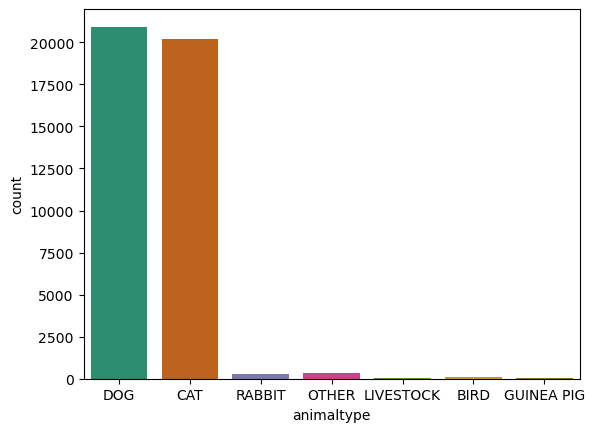

In [100]:
#create a bar chart of animaltypes
sns.countplot(x='animaltype', data=data)
plt.show()

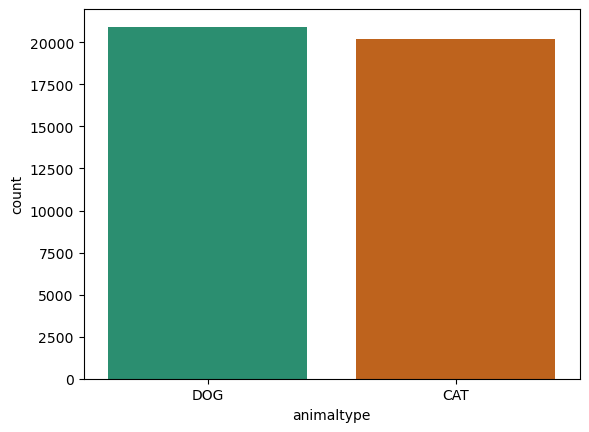

In [101]:
#drop all rows with animaltype != dog or cat
data_dc = data[data['animaltype'].isin(['DOG', 'CAT'])]
sns.countplot(x='animaltype', data=data_dc)
plt.show()

<Axes: xlabel='outtype'>

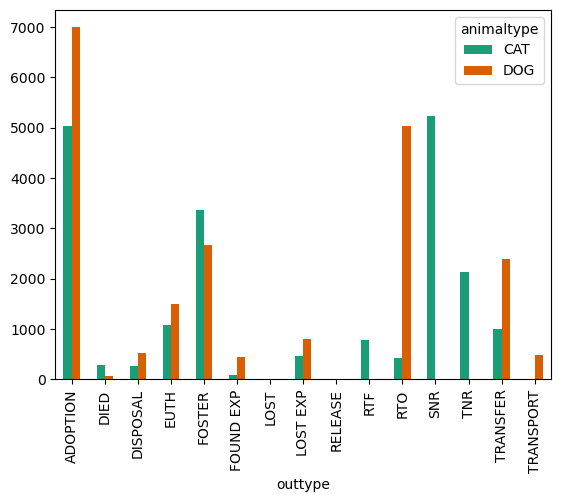

In [102]:
type_outs_tab = pd.crosstab(data_dc['outtype'],data_dc['animaltype'])
type_outs_tab.plot(kind='bar', stacked=False)

<Axes: xlabel='outtype'>

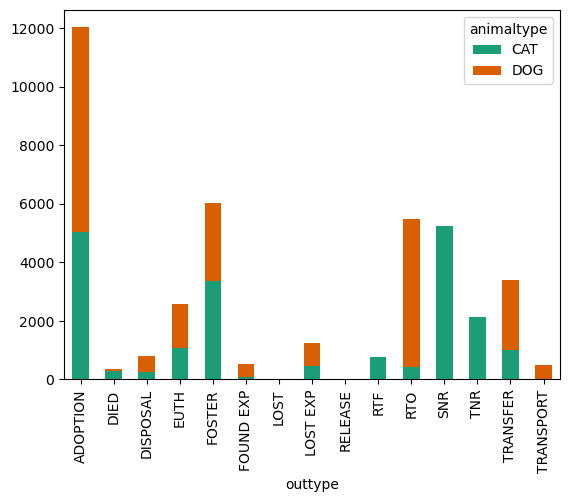

In [103]:
type_outs_tab.plot(kind='bar', stacked=True)

<Axes: xlabel='outtype'>

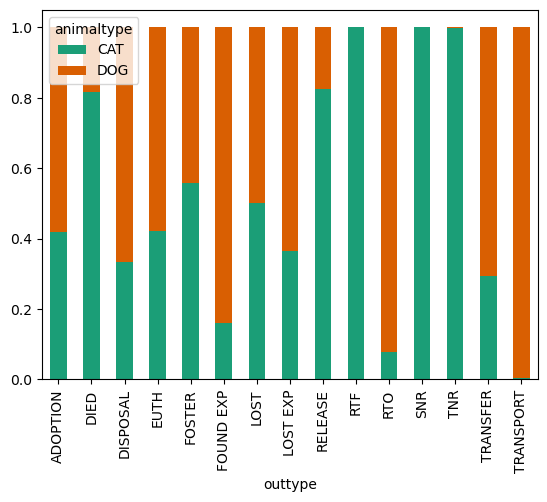

In [104]:
type_outs_tab_norm = type_outs_tab.div(type_outs_tab.sum(1), axis = 0)
type_outs_tab_norm.plot(kind='bar',stacked = True)

<Axes: xlabel='animaltype'>

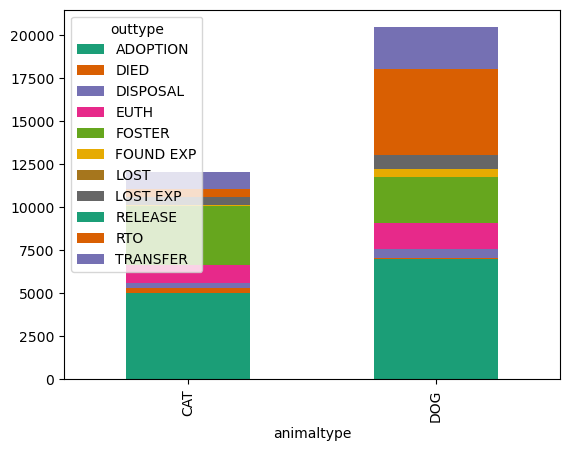

In [105]:
#create a crosstab of animaltype and outtype but exclude SNR, TNR, TRANSPORT, and RTF
type_outs_tab = pd.crosstab(data_dc['animaltype'],data_dc['outtype'])
type_outs_tab = type_outs_tab.drop(['SNR', 'TNR', 'TRANSPORT', 'RTF'], axis=1)
type_outs_tab.plot(kind='bar', stacked=True)

<Axes: xlabel='animaltype'>

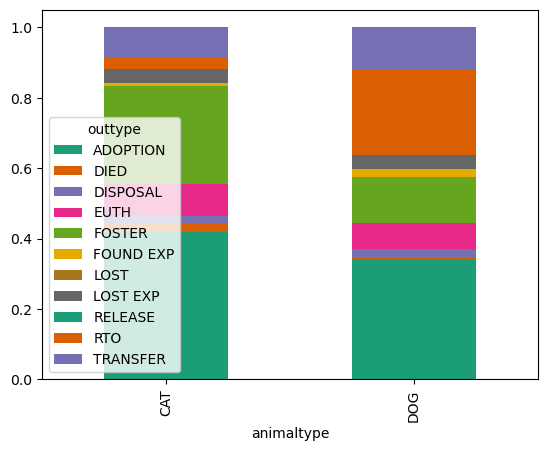

In [106]:
type_outs_tab_norm = type_outs_tab.div(type_outs_tab.sum(1), axis = 0)
type_outs_tab_norm.plot(kind='bar',stacked = True)

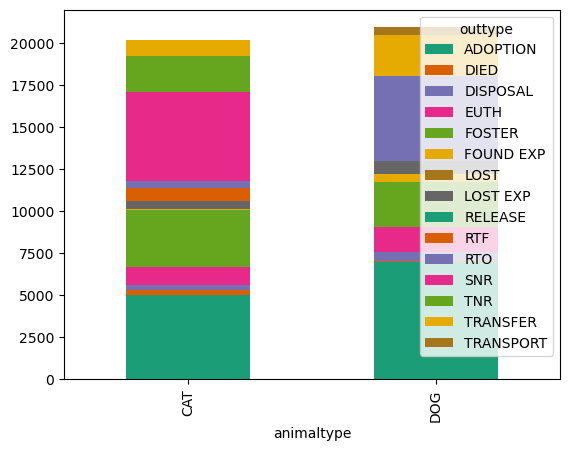

In [107]:
type_out_cross = pd.crosstab(data_dc['animaltype'], data_dc['outtype'])
type_out_cross.plot(kind='bar', stacked=True)
plt.show()

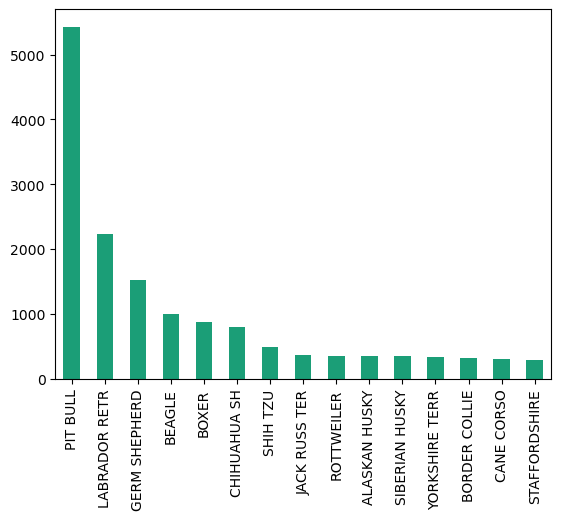

In [108]:
#create a bar chart of the top 15 breeds for dog animaltype
dog_breed = data_dc[data_dc['animaltype'] == 'DOG']
dog_breed = dog_breed['breed'].value_counts().head(15)
dog_breed.plot(kind='bar')
plt.show()

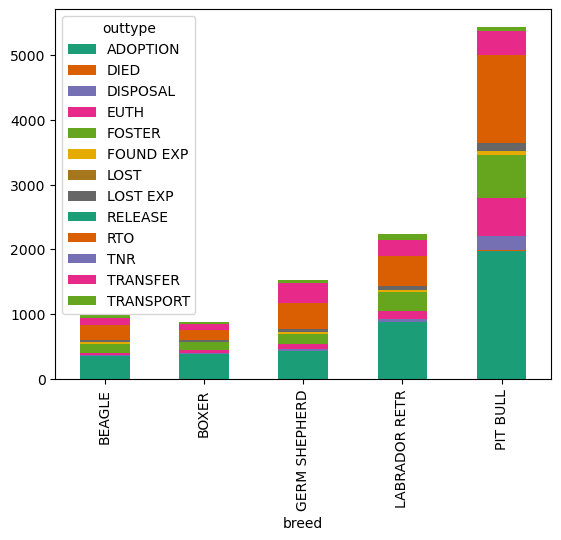

In [109]:
#for the top 5 breeds, create a stacked depiction of outtype euth, adoption, and return to owner. other than those 3, make it one bucket of other
dog_breed = data_dc[data_dc['animaltype'] == 'DOG']
dog_breed = dog_breed['breed'].value_counts().head(5)
dog_breed = dog_breed.index.tolist()
dog_breed = data_dc[data_dc['breed'].isin(dog_breed)]
dog_breed_tab = pd.crosstab(dog_breed['breed'], dog_breed['outtype'])
dog_breed_tab.plot(kind='bar', stacked=True)
plt.show()


make the colors not repeat and also move the map to the bottom

<Axes: xlabel='breed'>

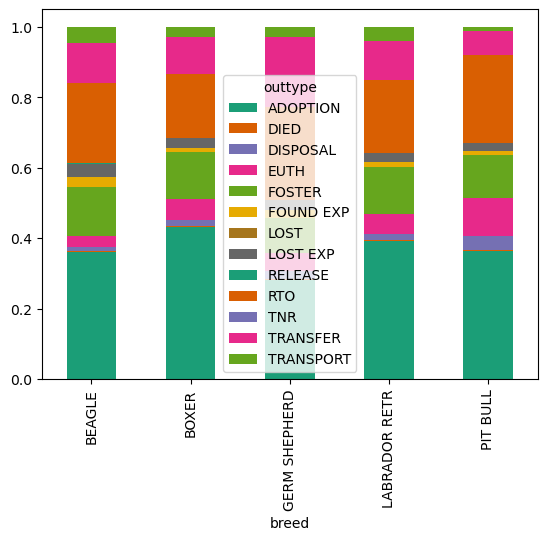

In [110]:
#normalize the above chart
dog_breed_tab_norm = dog_breed_tab.div(dog_breed_tab.sum(1), axis = 0)
dog_breed_tab_norm.plot(kind='bar',stacked = True)

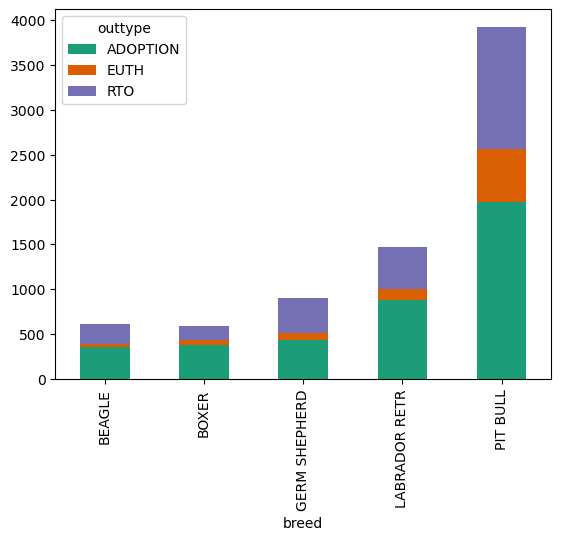

In [111]:
#for the above chart, only show adoption, euth, and rto. other than those 3, make it one bucket of other
dog_breed2 = data_dc[data_dc['animaltype'] == 'DOG']
dog_breed2 = dog_breed2['breed'].value_counts().head(5)
dog_breed2 = dog_breed2.index.tolist()
dog_breed2 = data_dc[data_dc['breed'].isin(dog_breed2)]
dog_breed_tab2 = pd.crosstab(dog_breed2['breed'], dog_breed2['outtype'])
dog_breed_tab2 = dog_breed_tab2[['ADOPTION', 'EUTH', 'RTO']]
dog_breed_tab2.plot(kind='bar', stacked=True)
plt.show()


<Axes: xlabel='breed'>

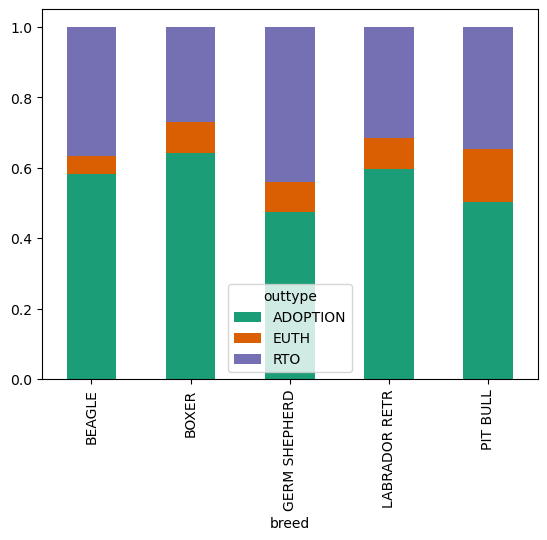

In [112]:
#normalize the above chart
dog_breed_tab_norm2 = dog_breed_tab2.div(dog_breed_tab2.sum(1), axis = 0)
dog_breed_tab_norm2.plot(kind='bar',stacked = True)


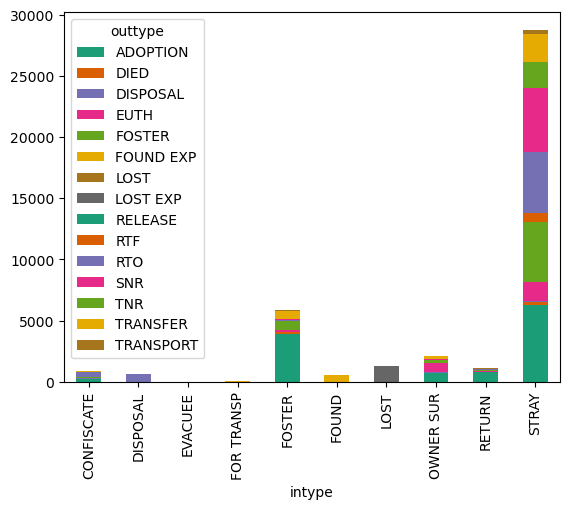

In [113]:
#compare intype with outtype
intype_outtype = pd.crosstab(data_dc['intype'], data_dc['outtype'])
intype_outtype.plot(kind='bar', stacked=True)
plt.show()


<Axes: xlabel='intype'>

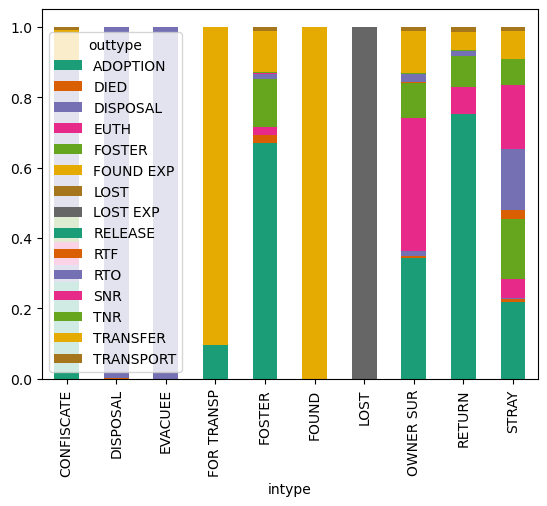

In [114]:
intype_outtype_norm = intype_outtype.div(intype_outtype.sum(1), axis = 0)
intype_outtype_norm.plot(kind='bar',stacked = True)

### Viz cont

<Axes: xlabel='days_in', ylabel='Count'>

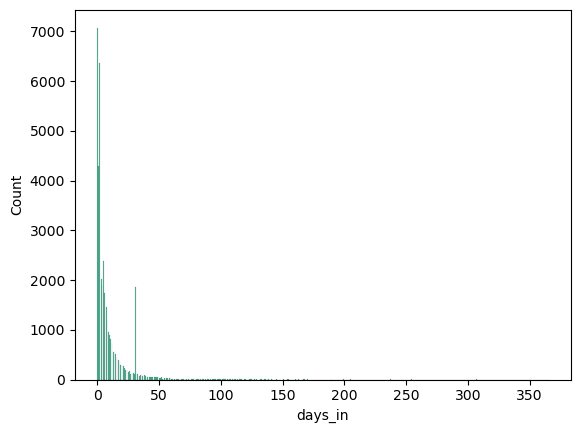

In [115]:
#histogram of days_in with hist
sns.histplot(data_dc['days_in'])

<Axes: xlabel='breed'>

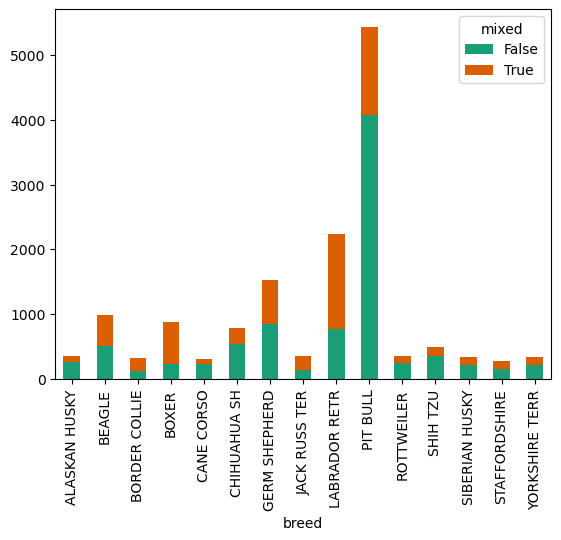

In [116]:
#show a stacked bar chart of mixed for the top 15 breeds
dog_breed = data_dc[data_dc['animaltype'] == 'DOG']
dog_breed = dog_breed['breed'].value_counts().head(15)
dog_breed = dog_breed.index.tolist()
dog_breed = data_dc[data_dc['breed'].isin(dog_breed)]
dog_breed_tab = pd.crosstab(dog_breed['breed'], dog_breed['mixed'])
dog_breed_tab.plot(kind='bar', stacked=True)

<Axes: xlabel='in_season', ylabel='count'>

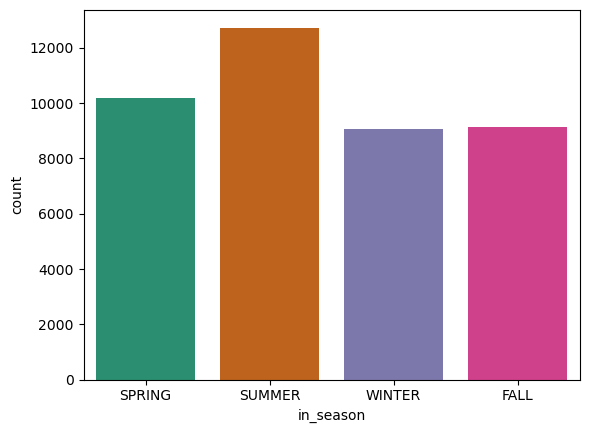

In [117]:
#bar chart of number by season
sns.countplot(x='in_season', data=data_dc)

<Axes: xlabel='out_season', ylabel='count'>

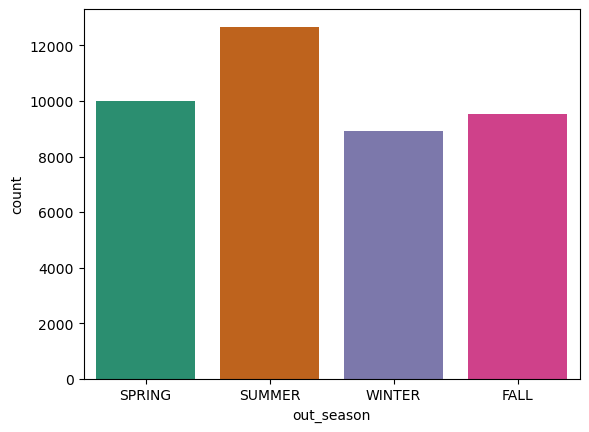

In [118]:
sns.countplot(x='out_season', data=data_dc)

<Axes: xlabel='animaltype'>

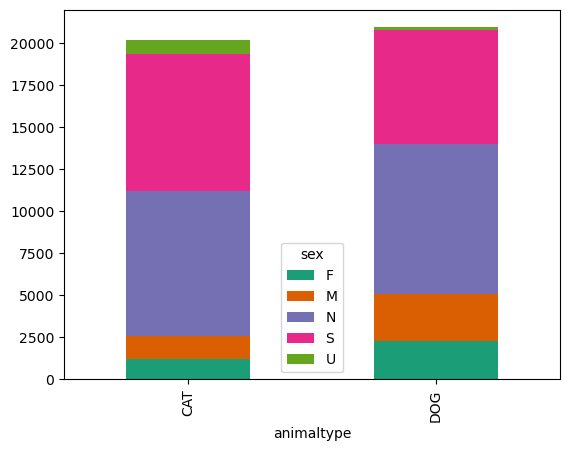

In [119]:
#stacked bar chart of sex and animaltype
anim_sex_tab = pd.crosstab(data_dc['animaltype'],data_dc['sex'])
anim_sex_tab.plot(kind='bar', stacked=True)


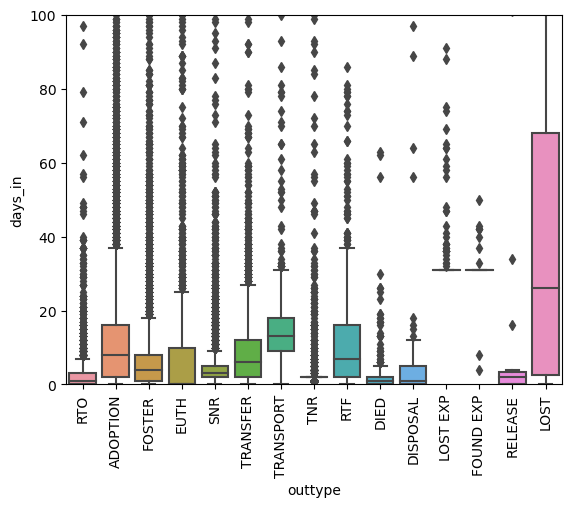

In [120]:
#create a dot plot for the outcome types by days_in
sns.boxplot(x='outtype', y='days_in', data=data_dc)
#rotate the x axis labels
plt.xticks(rotation=90)
#scale the y axis
plt.ylim(0, 100)
plt.show()

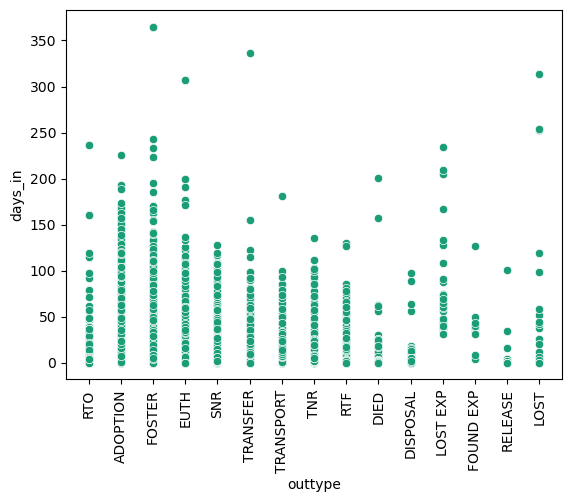

In [121]:
#create a scatter plot of the outcome types by days_in
sns.scatterplot(x='outtype', y='days_in', data=data_dc)
#rotate the x axis labels
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='days_in', ylabel='Count'>

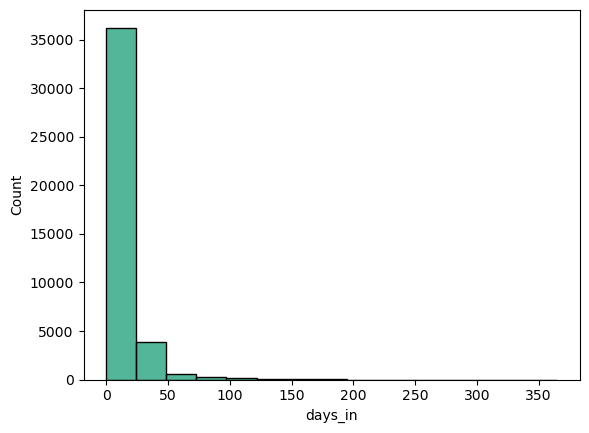

In [122]:
#histogram of days_in with 15 bins
sns.histplot(data_dc['days_in'], bins=15)


In [123]:
#for each variable, test for chi2 contigency with outtype and add the variable and p value to a list. get p to 5 decimal places
from scipy.stats import chi2_contingency
p_vals = []
for col in data_dc.columns:
    if col != 'outtype':
        chi2, p, dof, expected = chi2_contingency(pd.crosstab(data_dc[col], data_dc['outtype']))
        p_vals.append([col, p])
p_vals

[['intype', 0.0],
 ['insubtype', 0.0],
 ['surreason', 0.0],
 ['animaltype', 0.0],
 ['sex', 0.0],
 ['bites', 0.0],
 ['petsize', 0.0],
 ['color', 0.0],
 ['breed', 0.0],
 ['mixed', 0.0],
 ['breed2', 0.0],
 ['days_in', 0.0],
 ['in_season', 0.0],
 ['out_season', 0.0]]